In [134]:
import pandas as pd  # Para manipulação de dados tabulares
import numpy as np  # Para computação numérica eficiente
import matplotlib.pyplot as plt  # Para plotagem de gráficos
import scipy.stats as stats  # Para estatísticas
import seaborn as sns  # Para visualização de dados
from sklearn.cluster import KMeans  # Para clustering
from sklearn.preprocessing import StandardScaler  # Para pré-processamento de dados
from sklearn.decomposition import PCA  # Para redução de dimensionalidade
from sklearn.impute import SimpleImputer  # Para imputação de valores ausentes

In [101]:
# Carregar os dados
df_normal = pd.read_csv('arquivo_sem_ataque.csv')
df_ataque = pd.read_csv('arquivo_com_ataque.csv')

# Converter a coluna 'hora' para datetime
df_normal['hora'] = pd.to_datetime(df_normal['hora'])
df_ataque['hora'] = pd.to_datetime(df_ataque['hora'])

C:\Users\Acer\AppData\Local\Temp\ipykernel_17000\2448451389.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_normal = pd.read_csv('arquivo_sem_ataque.csv')


In [92]:
df_normal.columns

Index(['hora', 'ip', 'metodo', 'protocolo', 'hostname', 'uri', 'querystring',
       'status_code', 'f0_', 'useragent', 'tamanho_request',
       'tamanho_resposta', 'organizacao', 'pais', 'cidade', 'cookie_sessao',
       'fingerprint1', 'fingerprint2', 'fingerprint3'],
      dtype='object')

In [146]:
df_normal.head()

,ip,metodo,protocolo,hostname,uri,querystring,status_code,f0_,useragent,tamanho_request,tamanho_resposta,organizacao,pais,cidade,cookie_sessao,fingerprint1,fingerprint2,fingerprint3
hora,,,,,,,,,,,,,,,,,,
2024-05-16 00:59:18+00:00,187.32.366c247c96033ea60b63de9679e7406ba1bf121...,GET,HTTP/2.0,868f83bf58d18987c37f666969d3fce065a63cd02ff5f0...,/d5cf542a066aa75b28c555079525899adfef349042a0c...,?50148fa69f95e2a2bde55d4d27fd9d0611ada706e48d0...,302,https://09e19ca6d8847d228ee144afc65d2cc9db8bde...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,226,0.0,AS16735 ALGAR TELECOM SA,BR,Aparecida de Goiania,ceeb03fee1e179adb77ea75e9817343927b9eb4c974794...,2633728caa6baa2f9d75f5a27a0df167482910cd559a8f...,0593bc1576221bf63db5d6ea7e096c02fb15923f819896...,ad1f499e53e6325acdf7ad0759ef81b3442be7f0902e47...
2024-05-16 00:59:16+00:00,187.32.366c247c96033ea60b63de9679e7406ba1bf121...,GET,HTTP/2.0,868f83bf58d18987c37f666969d3fce065a63cd02ff5f0...,/d5cf542a066aa75b28c555079525899adfef349042a0c...,?9b70226ce15373c90996ed34173d7d0b3d2a299e2233d...,302,https://09e19ca6d8847d228ee144afc65d2cc9db8bde...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,90,0.0,AS16735 ALGAR TELECOM SA,BR,Aparecida de Goiania,ceeb03fee1e179adb77ea75e9817343927b9eb4c974794...,2633728caa6baa2f9d75f5a27a0df167482910cd559a8f...,0593bc1576221bf63db5d6ea7e096c02fb15923f819896...,ad1f499e53e6325acdf7ad0759ef81b3442be7f0902e47...
2024-05-16 00:59:16+00:00,187.32.366c247c96033ea60b63de9679e7406ba1bf121...,GET,HTTP/2.0,868f83bf58d18987c37f666969d3fce065a63cd02ff5f0...,/d5cf542a066aa75b28c555079525899adfef349042a0c...,?1e3c6f9eb16432ff4e2b7b71c013ebf48ce3389020ced...,302,https://09e19ca6d8847d228ee144afc65d2cc9db8bde...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,228,0.0,AS16735 ALGAR TELECOM SA,BR,Aparecida de Goiania,ceeb03fee1e179adb77ea75e9817343927b9eb4c974794...,2633728caa6baa2f9d75f5a27a0df167482910cd559a8f...,0593bc1576221bf63db5d6ea7e096c02fb15923f819896...,ad1f499e53e6325acdf7ad0759ef81b3442be7f0902e47...
2024-05-16 00:59:24+00:00,177.69.38967bbf070ce6a567f6807e59cf51e40d5406d...,GET,HTTP/2.0,868f83bf58d18987c37f666969d3fce065a63cd02ff5f0...,/d5cf542a066aa75b28c555079525899adfef349042a0c...,?50148fa69f95e2a2bde55d4d27fd9d0611ada706e48d0...,302,https://09e19ca6d8847d228ee144afc65d2cc9db8bde...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1237,0.0,AS16735 ALGAR TELECOM SA,BR,S\\xC3\\xA3o Bento do Sul,7ef80ba4187024a764159bb36381d5ddcd4955358a4023...,7a6b4cd932228469e512512d10c0ab4732371197a1268a...,1f333bf2dff13464aea663a63f9044deb36e230fbf89e8...,aa653714fe1271a6b3c218605d90413225a63570fc7419...
2024-05-16 00:59:24+00:00,177.69.38967bbf070ce6a567f6807e59cf51e40d5406d...,GET,HTTP/2.0,868f83bf58d18987c37f666969d3fce065a63cd02ff5f0...,/d5cf542a066aa75b28c555079525899adfef349042a0c...,?1e3c6f9eb16432ff4e2b7b71c013ebf48ce3389020ced...,302,https://09e19ca6d8847d228ee144afc65d2cc9db8bde...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1102,0.0,AS16735 ALGAR TELECOM SA,BR,S\\xC3\\xA3o Bento do Sul,7ef80ba4187024a764159bb36381d5ddcd4955358a4023...,7a6b4cd932228469e512512d10c0ab4732371197a1268a...,1f333bf2dff13464aea663a63f9044deb36e230fbf89e8...,aa653714fe1271a6b3c218605d90413225a63570fc7419...


In [102]:
# Contar o número de requisições por intervalo de 5 segundos
df_normal.set_index('hora', inplace=True)
df_ataque.set_index('hora', inplace=True)

# Resample (agregação) a cada 5 segundos
df_normal_resampled = df_normal.resample('5S').size()
df_ataque_resampled = df_ataque.resample('5S').size()


# Estatísticas descritivas do tráfego normal
print(df_normal_resampled.describe())

# Estatísticas descritivas do tráfego com ataque
print(df_ataque_resampled.describe())




count     1440.000000
mean       637.171528
std        723.055929
min        179.000000
25%        378.750000
50%        458.000000
75%        620.000000
max      10444.000000
dtype: float64
count     1440.000000
mean       242.266667
std        641.716583
min         41.000000
25%        140.000000
50%        190.000000
75%        244.000000
max      15077.000000
dtype: float64


In [103]:
# Conferir a distribuição da derivada (variação de acessos a cada 5 segundos)
df_normal_resampled_derivada = df_normal_resampled.copy()
df_normal_resampled_derivada = df_normal_resampled_derivada.reset_index()

df_ataque_resampled_derivada = df_ataque_resampled.copy()
df_ataque_resampled_derivada = df_ataque_resampled_derivada.reset_index()

# Criação da derivada para cada grupo
## Sem ataque
df_normal_resampled_derivada['derivada'] = df_normal_resampled_derivada[0].diff()
df_normal_resampled_derivada = df_normal_resampled_derivada.dropna()

## Com ataque
df_ataque_resampled_derivada['derivada'] = df_ataque_resampled_derivada[0].diff()
df_ataque_resampled_derivada = df_ataque_resampled_derivada.dropna()

(array([  1.,   0.,   0.,   1.,   3.,   3.,  17.,  36., 152., 718., 386.,
         95.,  16.,   5.,   4.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-1687.  , -1514.72, -1342.44, -1170.16,  -997.88,  -825.6 ,
         -653.32,  -481.04,  -308.76,  -136.48,    35.8 ,   208.08,
          380.36,   552.64,   724.92,   897.2 ,  1069.48,  1241.76,
         1414.04,  1586.32,  1758.6 ,  1930.88,  2103.16,  2275.44,
         2447.72,  2620.  ,  2792.28,  2964.56,  3136.84,  3309.12,
         3481.4 ,  3653.68,  3825.96,  3998.24,  4170.52,  4342.8 ,
         4515.08,  4687.36,  4859.64,  5031.92,  5204.2 ,  5376.48,
         5548.76,  5721.04,  5893.32,  6065.6 ,  6237.88,  6410.16,
         6582.44,  6754.72,  6927.  ]),
 <BarContainer object of 50 artists>)

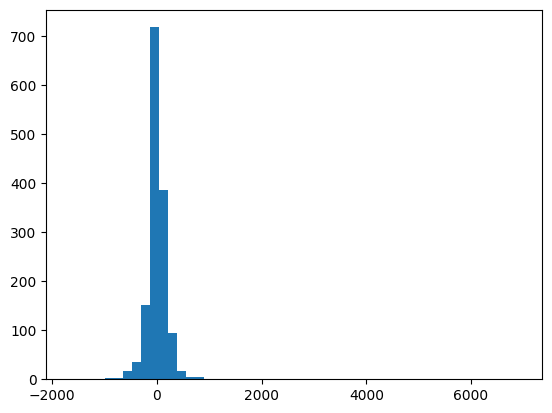

In [135]:
# Plotar histograma da distribuição esperada de acessos normais
plt.hist(df_normal_resampled_derivada['derivada'], bins=50)

In [96]:
# Usar CDF para a probabilidade acumulada
def prob_ataque(valor):
    cumulative_probability = stats.norm.cdf(valor, mu, sigma)
    if cumulative_probability <= 0.05:
        return True
    else:
        return False

In [104]:
# Parâmetros da distribuição normal para sem ataque
mu =  np.mean(df_normal_resampled_derivada['derivada'])    # Média
sigma = np.std(df_normal_resampled_derivada['derivada'])  # Desvio padrão


In [105]:
# Identificar quando começou o ataque:
df_ataque_resampled_derivada["ataque"] = df_ataque_resampled_derivada['derivada'].apply(prob_ataque)

In [106]:
df_ataque_resampled_derivada

,hora,0,derivada,ataque
1,2024-05-15 14:00:05+00:00,182,-168.0,False
2,2024-05-15 14:00:10+00:00,258,76.0,False
3,2024-05-15 14:00:15+00:00,211,-47.0,False
4,2024-05-15 14:00:20+00:00,123,-88.0,False
5,2024-05-15 14:00:25+00:00,153,30.0,False
...,...,...,...,...
1435,2024-05-15 15:59:35+00:00,268,147.0,False
1436,2024-05-15 15:59:40+00:00,169,-99.0,False
1437,2024-05-15 15:59:45+00:00,99,-70.0,False
1438,2024-05-15 15:59:50+00:00,86,-13.0,False


In [136]:
primeiro_ataque_index = df_ataque_resampled_derivada[df_ataque_resampled_derivada['ataque'] == True].index[0]

# Obter o valor da coluna 'hora' correspondente ao índice encontrado
primeira_hora_ataque = df_ataque_resampled_derivada.loc[primeiro_ataque_index, 'hora']

print("O primeiro momento detectado do ataque foi em:", primeira_hora_ataque)

O primeiro momento detectado do ataque foi em: 2024-05-15 15:01:05+00:00


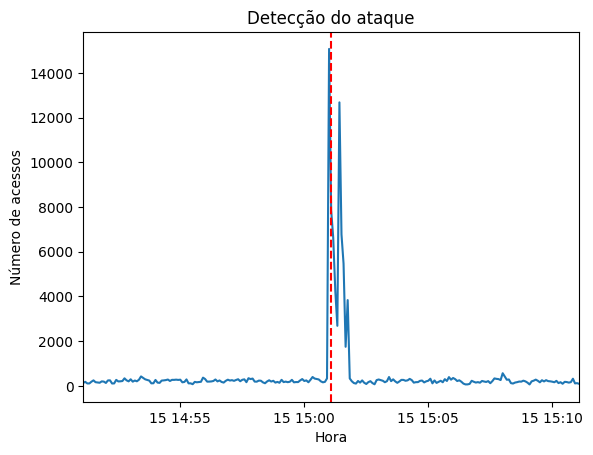

In [137]:
# Criar um objeto Timedelta para subtrair 10 unidades de tempo para facilitar a visualização
zoom_timedelta = pd.Timedelta(minutes=10)

# Calcular os limites de zoom
zoom_inicio = primeira_hora_ataque - zoom_timedelta
zoom_fim = primeira_hora_ataque + zoom_timedelta

# Criar o gráfico de linha com o zoom
plt.plot(df_ataque_resampled_derivada['hora'], df_ataque_resampled_derivada[0])
plt.axvline(x=primeira_hora_ataque, color='red', linestyle='--')

# Ajustar os limites do eixo x para o intervalo de zoom
plt.xlim(zoom_inicio, zoom_fim)

# Adicionar rótulos e título
plt.xlabel('Hora')
plt.ylabel('Número de acessos')
plt.title('Detecção do ataque')

# Mostrar o gráfico
plt.show()

In [138]:
# Preparação para filtrar o dataframe original
# Necessário devido à falta de memória RAM disponível

df_ataque_copia = df_ataque.copy()
df_ataque_copia = df_ataque_copia.reset_index()
df_ataque_copia.columns

Index(['hora', 'ip', 'metodo', 'protocolo', 'hostname', 'uri', 'querystring',
       'status_code', 'f0_', 'useragent', 'tamanho_request',
       'tamanho_resposta', 'organizacao', 'pais', 'cidade', 'cookie_sessao',
       'fingerprint1', 'fingerprint2', 'fingerprint3'],
      dtype='object')

In [152]:
# Filtragem do draframe original no período que ocorre o ataque

# Criar um objeto Timedelta para subtrair 10 unidades de tempo
zoom_timedelta = pd.Timedelta(minutes=30)

# Calcular os limites de zoom
zoom_inicio = primeira_hora_ataque - zoom_timedelta
zoom_fim = primeira_hora_ataque + zoom_timedelta

df_ataque_filtered = df_ataque_copia.loc[(df_ataque_copia['hora'] >= zoom_inicio) & (df_ataque_copia['hora'] <= zoom_fim)]

# Agrupar pelo número de IP e contar o número de requisições, mantendo outras variáveis importantes
df_agrupado = df_ataque_filtered.groupby('ip').agg({
    'metodo': 'count',  # Contagem do número de requisições
    'protocolo': 'first',  # Manter o primeiro protocolo encontrado para cada IP
    'status_code': 'mean',  # Calcular a média dos códigos de status para cada IP
    'organizacao': 'first',  # Manter a primeira organização encontrada para cada IP
    'pais': 'first',  # Manter o primeiro país encontrado para cada IP
    'cidade': 'first'  # Manter a primeira cidade encontrada para cada IP
}).reset_index()

# Renomear colunas para maior clareza
df_agrupado.rename(columns={'metodo': 'num_requisicoes', 'status_code': 'media_status_code'}, inplace=True)

# Selecionar as colunas relevantes para o modelo de clusterização
X = df_agrupado.drop(['ip'], axis=1)

# Codificar variáveis categóricas
X_encoded = pd.get_dummies(X, columns=['protocolo', 'organizacao', 'pais', 'cidade'], drop_first=True)

# Imputar valores ausentes, se houver
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

# Treinamento do modelo de clusterização para detecção dos atacantes
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_imputed)

# Adicionar rótulos de cluster aos dados
df_agrupado['cluster'] = kmeans.labels_

# Exibir os resultados
print(df_agrupado)

d:\.pyspark-env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                                                     ip  num_requisicoes  \
0     1.171.e7f780a53a8f9a88b852d2db170ad1ef1c26c546...                3   
1     1.238.158a475305d67e3a36fb9f4d9ad1a9ab63b20899...               27   
2     100.24.1bf2631c5b91a5aa54156081513aa3610649a1a...                1   
3     100.24.4e49a5452bcb3de16117804117bcbf6c80c8eda...                4   
4     100.24.db2ec26d2e63fa55470bc05cc2ab9c69754c591...                1   
...                                                 ...              ...   
5729  98.64.26ba85c6e62da0dead9e22b256265e4de7569d98...                1   
5730  98.64.26ba85c6e62da0dead9e22b256265e4de7569d98...                2   
5731  98.64.26ba85c6e62da0dead9e22b256265e4de7569d98...                1   
5732  98.64.26ba85c6e62da0dead9e22b256265e4de7569d98...                1   
5733  98.64.26ba85c6e62da0dead9e22b256265e4de7569d98...                2   

     protocolo  media_status_code                               organizacao  \
0     HT

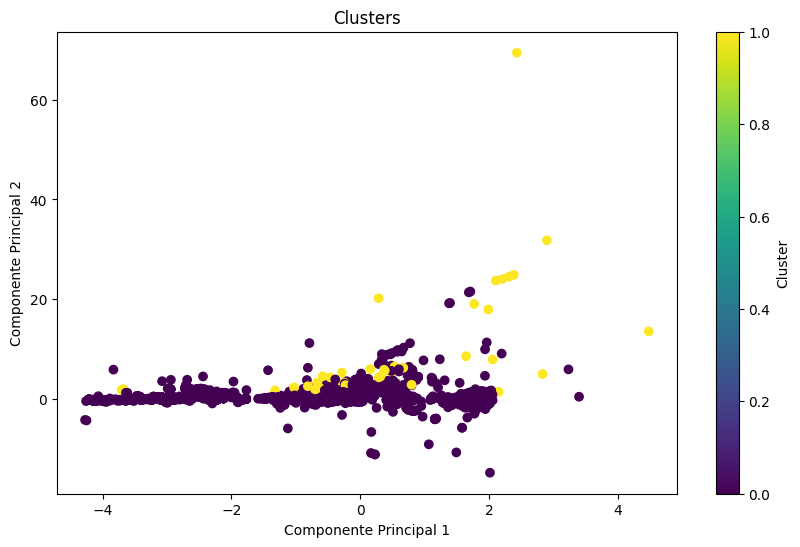

In [153]:
# Redução de dimensionalidade
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualização dos clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_agrupado['cluster'])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters')
plt.colorbar(label='Cluster')
plt.show()

In [155]:
df_agrupado[df_agrupado['cluster'] == 1]

,ip,num_requisicoes,protocolo,media_status_code,organizacao,pais,cidade,cluster
12,102.38.0db90da64ebb9a03f33dd6582c4a6af44a4a8e1...,1844,HTTP/2.0,222.538503,AS328539 Giga-Communication,LY,Tripoli,1
14,102.38.d98a7775c15090bddd70b9a902f89037942739d...,1647,HTTP/2.0,218.154220,AS328539 Giga-Communication,LY,Tripoli,1
93,107.152.b9bd7e237ea45f6325a643de8b392b744df47c...,1083,HTTP/2.0,233.958449,AS11878 TZULO,US,None,1
94,107.152.fb3d8efe7989e1e6b9212ebaa47ba0a89910c4...,933,HTTP/2.0,279.476956,AS11878 TZULO,US,None,1
115,108.161.b8ba754978d5d89e16654b806adfc6bcb5c187...,712,HTTP/2.0,257.532303,AS40805 JMF-NETWORKS,US,Nashville,1
127,109.73.47efd2b94e559f789fe9518700a2993d40787ec...,708,HTTP/2.0,329.228814,AS31261 PJSC MegaFon,RU,None,1
248,134.17.b00207a3c30f895ccdfd7cd0ee32c489c6b9b79...,1237,HTTP/2.0,234.565077,AS25106 Mobile TeleSystems JLLC,BY,Minsk,1
257,137.184.58f1d611e5635b645963f649dbde01a5b4b9de...,800,HTTP/2.0,247.466250,AS14061 DIGITALOCEAN-ASN,US,North Bergen,1
312,138.3.bfb9373a1163b6c93fe6aa50f9010de1bc913630...,1848,HTTP/2.0,257.599567,AS31898 ORACLE-BMC-31898,DE,Frankfurt am Main,1
1349,172.105.21fa4504f6b982c2fd28bff067a4fc58926bf7...,892,HTTP/2.0,264.693946,AS63949 Akamai Connected Cloud,CA,Toronto,1
